In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib import style
style.use('seaborn')

In [3]:
file = open("Resources\satoshi-whitepaper.txt", "r")
text = file.read().lower()
total_words = len(text.split())
path = "Resources/male-female-words.csv"
word_counts = pd.read_csv(path)

In [4]:
counts = [text.count(f" {word} ") for word in word_counts['Word']]

In [5]:
word_count_df = pd.DataFrame({
    'Word':word_counts['Word'],
    'Score':word_counts['Score'],
    'Count in Text':counts
})
word_count_df['Word Score for Text'] = [word_count_df['Score'][x] * word_count_df['Count in Text'][x] for x in range(len(word_count_df))]
word_count_df['Pct of Words in Text'] = [round((word_count_df['Count in Text'][x] / total_words)*100, 2) for x in range(len(word_count_df))]
word_count_df

,Word,Score,Count in Text,Word Score for Text,Pct of Words in Text
0,a,-6,101,-606,3.34
1,above,-4,0,0,0.00
2,are,-28,16,-448,0.53
3,around,-42,0,0,0.00
4,as,-60,29,-1740,0.96
5,at,-6,8,-48,0.26
6,below,-8,0,0,0.00
7,ever,-21,3,-63,0.10
8,good,-31,0,0,0.00
9,in,-10,28,-280,0.93


In [6]:
male_score = -(word_count_df['Word Score for Text'].loc[word_count_df['Score'] < 0].sum())
female_score = word_count_df['Word Score for Text'].loc[word_count_df['Score'] > 0].sum()

male_final_score = male_score / (female_score + male_score)
print(male_final_score)
female_final_score = female_score / (female_score + male_score)
print(female_final_score)

0.7073889689506092
0.2926110310493908


In [7]:
male_words = word_count_df['Word'].loc[word_count_df['Score'] < 0]
female_words = word_count_df['Word'].loc[word_count_df['Score'] > 0]
male_count = word_count_df['Count in Text'].loc[word_count_df['Score'] < 0]
female_count = word_count_df['Count in Text'].loc[word_count_df['Score'] > 0]
print(male_words)
print(male_count)
print(female_words)
print(female_count)

0             a
1         above
2           are
3        around
4            as
5            at
6         below
7          ever
8          good
9            in
10           is
11           it
12         many
13          now
14         said
15         some
16    something
17          the
18        these
19         this
20           to
21         well
22         what
23          who
Name: Word, dtype: object
0     101
1       0
2      16
3       0
4      29
5       8
6       0
7       3
8       0
9      28
10     50
11     26
12      3
13      1
14      0
15      4
16      0
17    226
18      2
19     11
20    114
21      1
22      2
23      2
Name: Count in Text, dtype: int64
24      actually
25            am
26           and
27            be
28       because
29           but
30    everything
31           has
32            if
33          like
34          more
35           not
36           out
37        should
38         since
39            so
40           too
41           was
42        

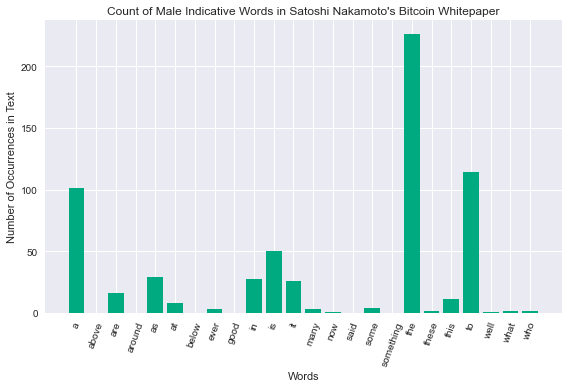

In [14]:
plt.bar(male_words,male_count,color='#00AA80')
plt.xticks(rotation=70)
plt.xlabel('Words')
plt.ylabel('Number of Occurrences in Text')
plt.title("Count of Male Indicative Words in Satoshi Nakamoto's Bitcoin Whitepaper")
plt.tight_layout()
plt.savefig('Figures/Male-Count.png')
plt.show()


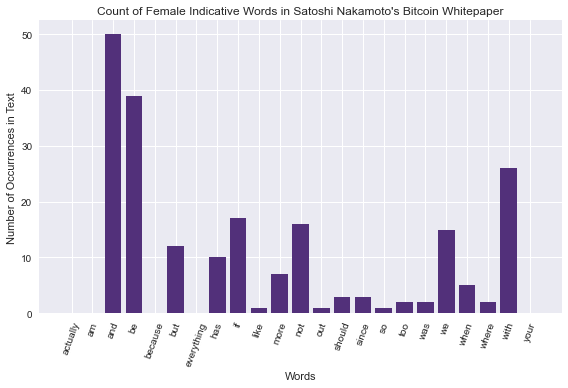

In [26]:
plt.bar(female_words,female_count,color='#52307A')
plt.xticks(rotation=70)
plt.xlabel('Words')
plt.ylabel('Number of Occurrences in Text')
plt.title("Count of Female Indicative Words in Satoshi Nakamoto's Bitcoin Whitepaper")
plt.tight_layout()
plt.savefig('Figures/Female-Count.png')
plt.show()

In [29]:
colors = []
for score in word_count_df['Score']:
    if score > 0:
        color = '#52307A'
        colors.append(color)
    elif score < 0:
        color = '#00AA80'
        colors.append(color)

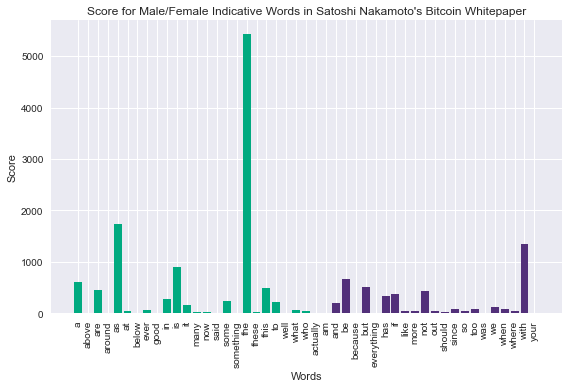

In [30]:
plt.bar(word_count_df['Word'],abs(word_count_df['Word Score for Text']), color=colors)
plt.xticks(rotation='vertical')
plt.xlabel('Words')
plt.ylabel('Score')
plt.title("Score for Male/Female Indicative Words in Satoshi Nakamoto's Bitcoin Whitepaper")
plt.tight_layout()
plt.savefig('Figures/Male_Female_Scores.png')
plt.show()

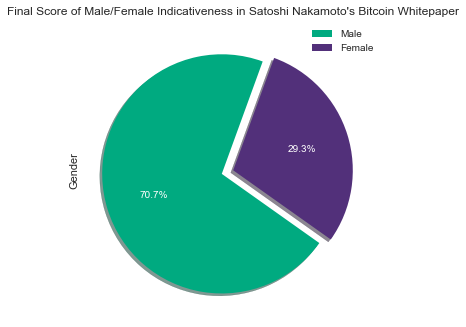

In [31]:
final_scores = [male_final_score,female_final_score]
genders = ["Male", "Female"]
colors = ('#00AA80', '#52307A')
explode = (0.1,0)

plt.pie(final_scores, colors=colors, labels=genders, explode=explode, autopct="%1.1f%%",shadow=True, startangle=70, textprops={'color':'w'})
plt.title("Final Score of Male/Female Indicativeness in Satoshi Nakamoto's Bitcoin Whitepaper")
plt.legend(loc='best')
plt.ylabel('Gender')
plt.savefig('Figures/Final_Score.png')
plt.show()

In [13]:
word_count_df.to_html('satoshi_text_data.html')